# Import libraries and data

In [120]:
# import libraries 
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

from Bio.SeqUtils.ProtParam import ProteinAnalysis
from matplotlib import patches
from matplotlib_venn import venn2, venn3
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import fdrcorrection

In [121]:
data_path = os.getcwd() + "/Datasets/"
fig_path = os.getcwd() + "/Figures/"

## Feature brain data set

In [122]:
df_features = pd.read_csv(data_path + "/Features/df_features_brain.csv")
df_features

,Uniprot,Sequence,Length,Molecular weight,A,C,D,E,F,G,...,GlycoMine_N,GlycoMine_O,GlycoMine_C,GPI-anchor,Signal peptide,RNA_binding,DNA_binding,Prot_bind,Prot_bind_binary,CSF
0,Q8TDC3,MSSGAKEGGGGSPAYHLPHPHPHPPQHAQYVGPYRLEKTLGKGQTG...,778,85085.7493,0.051414,0.012853,0.043702,0.065553,0.029563,0.092545,...,1,1,0,0,0,0,0,0.029563,1,1
1,P48065,MDGKVAVQECGPPAVSWVPEEGEKLDQEDEDQVKDRGQWTNKMEFV...,614,69367.5176,0.052117,0.037459,0.030945,0.043974,0.083062,0.081433,...,1,0,0,0,0,0,0,0.340391,1,-1
2,Q9Y250,MGSVSSLISGHSFHSKHCRASQYKLRKSSHLKKLNRYSDGLLRFGF...,596,66612.1565,0.060403,0.011745,0.041946,0.104027,0.023490,0.072148,...,1,1,0,0,0,0,1,0.145973,1,-1
3,P0DMW5,MAASAALSAAAAAAALSGLAVRLSRSAAARGSYGAFCKGLTRTLLT...,78,8388.8176,0.230769,0.012821,0.012821,0.012821,0.064103,0.051282,...,0,0,0,0,0,0,0,1.000000,1,-1
4,P21579,MVSESHHEALAAPPVTTVATVLPSNATEPASPGEGKEDAFSKLKEK...,422,47572.5391,0.063981,0.014218,0.061611,0.082938,0.045024,0.059242,...,0,1,0,0,0,0,0,0.021327,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,Q8IZU8,MALMFTGHLLFLALLMFAFSTFEESVSNYSEWAVFTDDIDQFKTQK...,1212,139235.8716,0.067657,0.009076,0.045380,0.048680,0.063531,0.055281,...,0,0,0,0,1,0,0,0.000000,0,-1
2538,Q4JDL3,MSSPRDFRAEPVNDYEGNDSEAEDLNFRETLPSSSQENTPRSKVFE...,420,48422.3273,0.047619,0.019048,0.057143,0.083333,0.052381,0.045238,...,0,0,0,0,0,0,0,0.321429,1,-1
2539,Q8N4V2,MEEDLFQLRQLPVVKFRRTGESARSEDDTASGEHEVQIEGVHVGLE...,548,60768.4670,0.085766,0.023723,0.031022,0.062044,0.056569,0.082117,...,0,0,0,0,0,0,0,0.472628,1,-1
2540,P48426,MATPGNLGSSVLASKTKTKKKHFVAQKVKLFRASDPLLSVLMWGVN...,406,46224.0440,0.056650,0.009852,0.068966,0.073892,0.046798,0.051724,...,0,1,0,0,0,0,0,0.009852,1,-1


## Glycosylation data sets

In [123]:
NglycAtlas = pd.read_csv(data_path + "Glycosylation/Human_N-glycosylation_sites_N-GlycositeAtlas.csv", sep=";", header=1)
df_features["NglycAtlas"] = np.where(df_features["Uniprot"].isin(NglycAtlas["Accession (UniProtKB)"]), 1, 0)

In [124]:
OGlcNAcDB = pd.read_csv(data_path + "Glycosylation/O-GlcNAcome_O-GlcNAc_Database.csv")
df_features["OGlcNAcDB"] = np.where(df_features["Uniprot"].isin(OGlcNAcDB["UniprotKB ID"]), 1, 0)

In [125]:
Uniprot = pd.read_csv(data_path + "Glycosylation/Glycoprotein_human_Uniprot.list", header=None, names=["Uniprot"])
df_features["Uniprot_Glycoprotein"] = np.where(df_features["Uniprot"].isin(Uniprot["Uniprot"]), 1, 0)

In [126]:
dbPTM_O = pd.read_csv(data_path + "Glycosylation/O-linked_glycosylation_dbPTM.txt", sep="\t", header=None, 
    names=["Name", "Uniprot", "Site", "Type", "Number", "Sequence"])
dbPTM_N = pd.read_csv(data_path + "Glycosylation/N-linked_glycosylation_dbPTM.txt", sep="\t", header=None, 
    names=["Name", "Uniprot", "Site", "Type", "Number", "Sequence"])
# no annotations in brain proteome
# dbPTM_C = pd.read_csv(data_path + "Glycosylation/C-linked_glycosylation_dbPTM.txt", sep="\t", header=None, 
#     names=["Name", "Uniprot", "Site", "Type", "Number", "Sequence"]) 
df_features["dbPTM_O"] = np.where(df_features["Uniprot"].isin(dbPTM_O["Uniprot"]), 1, 0)
df_features["dbPTM_N"] = np.where(df_features["Uniprot"].isin(dbPTM_N["Uniprot"]), 1, 0)
df_features["dbPTM_C"] = np.where(df_features["Uniprot"].isin(dbPTM_C["Uniprot"]), 1, 0)

In [127]:
OGalNAc_PSP = pd.read_csv(data_path + "Glycosylation/O-GalNAc_PhosphoSitePlus.tab", sep="\t", header=2)
OGlcNAc_PSP = pd.read_csv(data_path + "Glycosylation/O-GlcNAc_PhosphoSitePlus.tab", sep="\t", header=2)
df_features["PSP"] = np.where(df_features["Uniprot"].isin(OGalNAc_PSP["ACC_ID"]), 1, 0)
df_features["PSP"] = np.where(df_features["Uniprot"].isin(OGlcNAc_PSP["ACC_ID"]), 1, df_features["PSP"])

In [128]:
#### TO DO ####
# clean up Uniprot column
iPTM = pd.read_csv(data_path + "/Glycosylation/iPTMnet_annotations.txt"  , sep="\t")
iPTM = iPTM[iPTM["organism"] == "Homo sapiens (Human)"]
iPTM_C = iPTM[iPTM["ptm_type"] =="C-GLYCOSYLATION"]
iPTM_N = iPTM[iPTM["ptm_type"] =="N-GLYCOSYLATION"]
iPTM_S = iPTM[iPTM["ptm_type"] =="S-GLYCOSYLATION"]
iPTM_O = iPTM[iPTM["ptm_type"] =="O-GLYCOSYLATION"]

df_features["iPTM_N"] = np.where(df_features["Uniprot"].isin(iPTM_N["substrate_UniProtAC"]), 1, 0)
df_features["iPTM_O"] = np.where(df_features["Uniprot"].isin(iPTM_O["substrate_UniProtAC"]), 1, 0)

C:\Users\kathi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Curated CSF data set

In [129]:
csf = pd.read_csv(data_path + "CSF/all_csf_1000plus.csv")
csf["#Studies"] = csf[["#Peptides_Macron2018A", "#Peptides_Macron2020", "#Peptides_Zhang2015",
    "#Peptides_Guldbrandsen2014", "#Peptides_Macron2018B", "#Peptides_Schutzer2010", "#Peptides_Pan2007"]].count(axis=1)

In [130]:
def increase_stringency_CSF(feature_df, csf_df, i):
    
    stringent_csf = csf_df[csf_df["#Studies"]>=i]["Uniprot"]
    remove_csf = set(df_features[df_features["CSF"] == 1]["Uniprot"]) - set(stringent_csf)
    df_stringent = df_features.drop(df_features[(df_features["CSF"] == 1) & (df_features["Uniprot"].isin(remove_csf))].index)
    
    print("Number of CSF proteins to be removed:", len(remove_csf))
    print("Number of CSF proteins left:", len(df_stringent[(df_stringent["CSF"] == 1)]))   
    
    return df_stringent

# create more stirngent data sets
df_features_2plus = increase_stringency_CSF(df_features, csf, 2)
print("Number of proteins in dataset:", len(df_features_2plus))
print("-------------")
df_features_3plus = increase_stringency_CSF(df_features, csf, 3)
print("Number of proteins in dataset:", len(df_features_3plus))

Number of CSF proteins to be removed: 303
Number of CSF proteins left: 692
Number of proteins in dataset: 2239
-------------
Number of CSF proteins to be removed: 454
Number of CSF proteins left: 541
Number of proteins in dataset: 2088


In [131]:
non_CSF = df_features[df_features["CSF"] == -1]
CSF_1plus = df_features[df_features["CSF"] == 1]
CSF_2plus = df_features_2plus[df_features_2plus["CSF"] == 1]
CSF_3plus = df_features_3plus[df_features_3plus["CSF"] == 1]

df_list = [non_CSF, CSF_1plus, CSF_2plus, CSF_3plus]
names = ["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"]

In [132]:
def get_percentages(df_list, col):
        
    perc_list = []
    for i in range(len(df_list)):
        perc_list.append(sum(df_list[i][col])/len(df_list[i]))

    return perc_list

# Glycosylation analysis

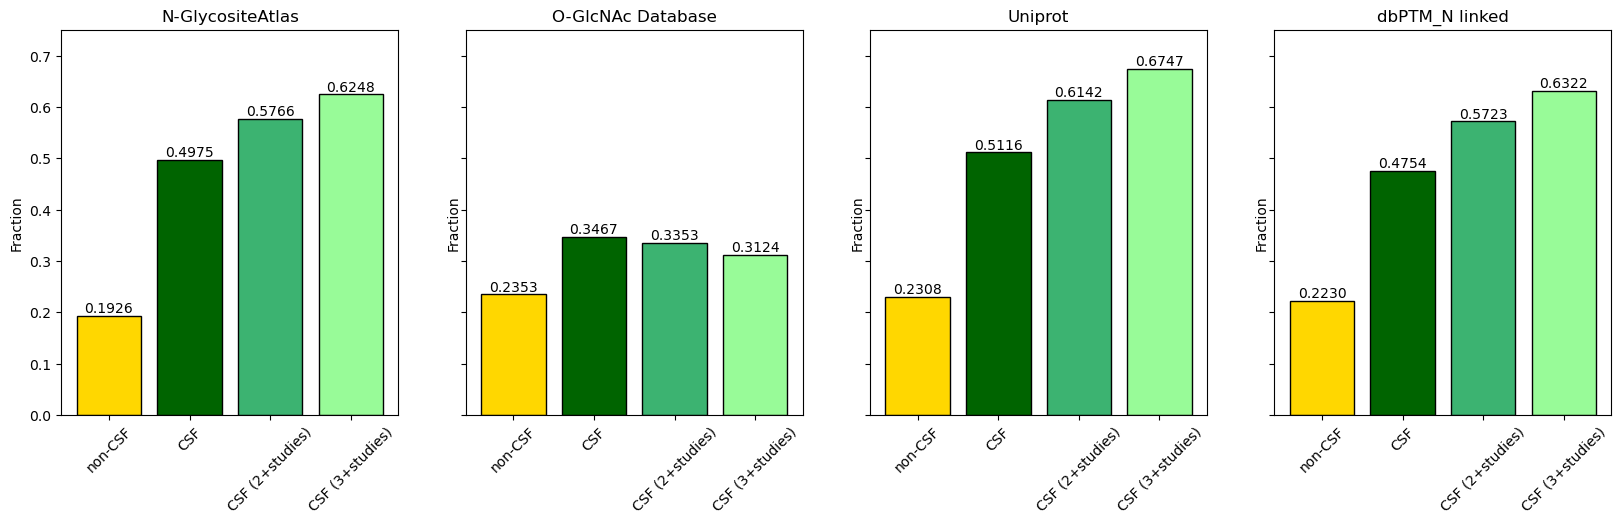

In [153]:
features = ["NglycAtlas", "OGlcNAcDB", "Uniprot_Glycoprotein", "dbPTM_N"]
names = ["N-GlycositeAtlas", "O-GlcNAc Database", "Uniprot", "dbPTM_N linked"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation = 45)
    ax[i].set(ylabel="Fraction", title=names[i], ylim=(0, 0.75))

plt.show()
fig.savefig(fig_path + "Bar_glycosylation_annotations_A.png", bbox_inches="tight")

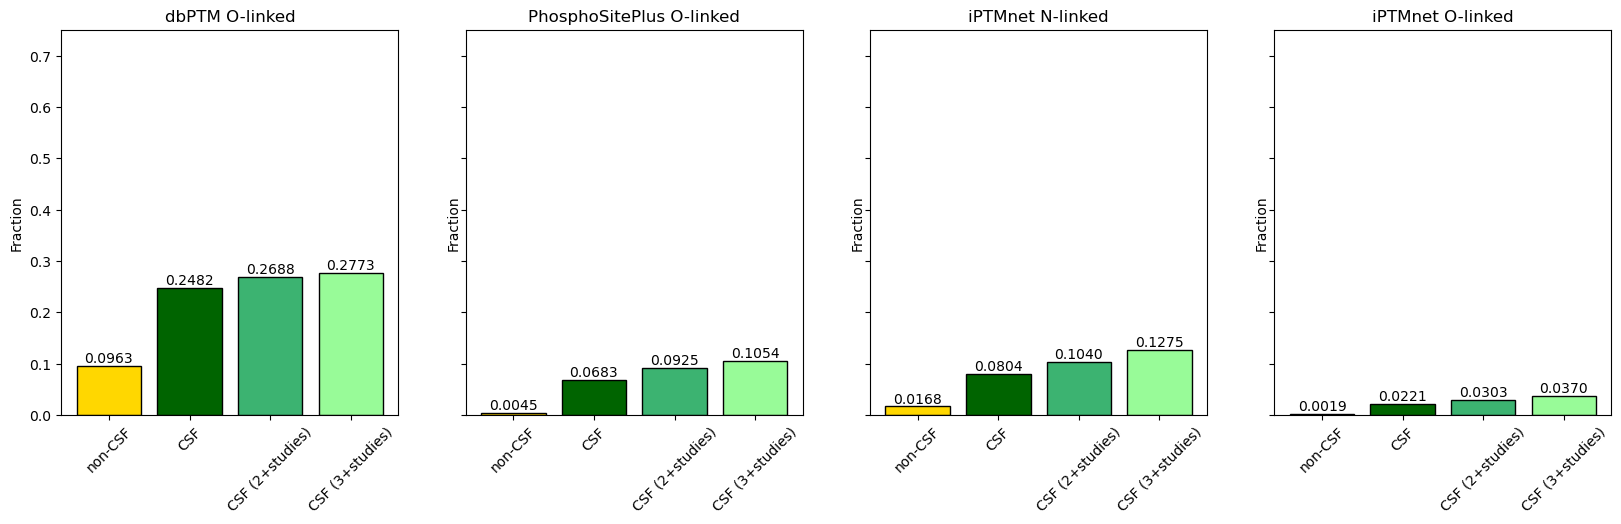

In [152]:
features = ["dbPTM_O", "PSP", "iPTM_N", "iPTM_O"]
names = ["dbPTM O-linked", "PhosphoSitePlus O-linked", "iPTMnet N-linked", "iPTMnet O-linked"]

fig, ax = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

for i in range(len(features)):
    bars = ax[i].bar(x=["non-CSF", "CSF", "CSF (2+studies)", "CSF (3+studies)"], height=get_percentages(df_list, features[i]),
        color=["gold", "darkgreen", "mediumseagreen", "palegreen"], edgecolor="black")
    ax[i].bar_label(bars, fmt="%.4f")
    ax[i].tick_params(axis="x", labelrotation = 45)
    ax[i].set(ylabel="Fraction", title=names[i], ylim=(0, 0.75))

plt.show()
fig.savefig(fig_path + "Bar_glycosylation_annotations_B.png", bbox_inches="tight")